# Redes Neuronales Convolucionales

## Bibliotecas utilizadas

In [1]:
# General librarys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir

# Tensorflow-keras librarys
import tensorflow as tf

# Keras models
from keras.models import Sequential

# Keras layers
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

# Keras preprocessing module
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Sckit learn library
from sklearn.model_selection import train_test_split

## Plot Sample Data

Impresión de algunas fotos de perros.

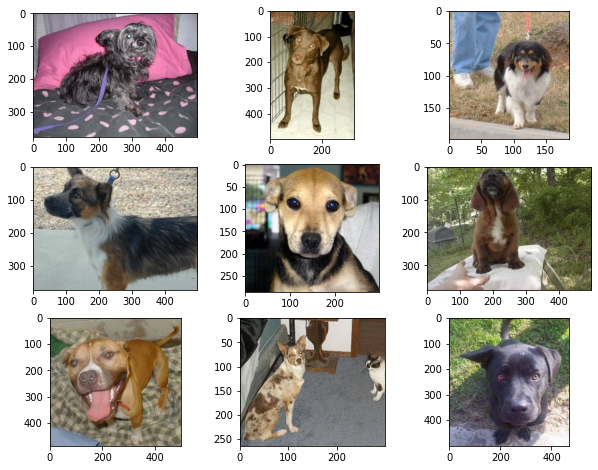

In [2]:
# Ruta de acceso a las imágenes
folder = "train/"

plt.figure(figsize=(10,8))
for i in range(9):
    plt.subplot(330+1+i)
    filename = folder+"dog."+str(i)+".jpg"
    image = imread(filename)
    plt.imshow(image)
plt.show()

## Transformación de datos

En este paso se realiza una transformación de datos, primero se redimensionan las imágenes a un tamaño fijo de 200 x 200 pixeles y después se transforma de imágenes en una carpeta a un arreglo de numpy que contiene todas las imágenes, las dimensiones de este arreglo es (25000, 200, 200, 3).

In [3]:
folder = "train/"
photos, labels = list(), list()

for file in listdir(folder):
    output = 0.0
    if file.startswith("dog"):
        output = 1.0
    
    photo = load_img(folder+file, target_size=(200,200))
    photo = img_to_array(photo)
    
    photos.append(photo)
    labels.append(output)
    
photos = np.asarray(photos)
labels = np.asarray(labels)
print(photos.shape, labels.shape)

np.save("dogs_vs_cats_photos.npy", photos)
np.save("dogs_vs_cats_labels.npy", labels)

(25000, 200, 200, 3) (25000,)


### Impresión de fotos transformadas

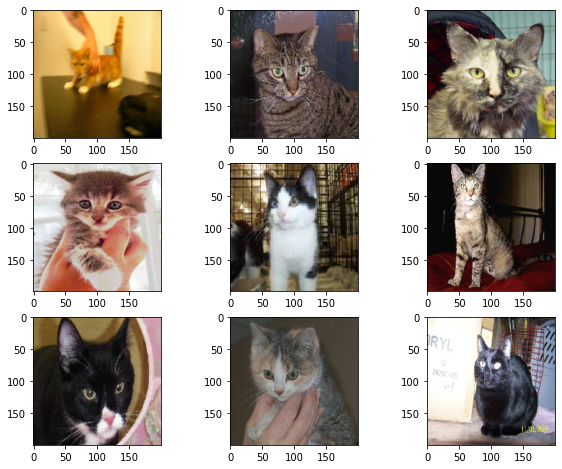

In [16]:
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(photos[i])
plt.show()

## Cargando datos desde archivos

Durante este apartado se carga el arreglo numpy, después se normaliza los valores diviendo entre 255 para que quede en un rango de 0 a 1.

In [2]:
# Loading data
photos = np.load("dogs_vs_cats_photos.npy")
labels = np.load("dogs_vs_cats_labels.npy")

# Normalizing data
photos = photos/255

# Split data in training and test
X_train, X_test, y_train, y_test = train_test_split(
    photos, labels, test_size=0.20, random_state=20)

print(photos.shape, labels.shape)
print(X_train.shape, X_test.shape)

(25000, 200, 200, 3) (25000,)
(20000, 200, 200, 3) (5000, 200, 200, 3)


## Función Modelo Base

Se utilizará un modelo VGG (Visual Geometry Group) de Red Neural Convolucional. Éstos modelos han funcionado bien para el reconocimiento de imágenes de gran tamaño.

La profundidad de estas redes suele referirse al número de capas y bloques que compone la red:
* VGG-16: 16 capas convolucionales.
* VGG-19: 19 capas convolucionales.

**Ejemplo de una arquitectura VGG-16**

![Arquitectura VGG-16](media/VGG-16%20example.png)

## Funciones de la red

### Función curvas de aprendizaje

Esta función nos permite graficar las curvas de aprendiza para conocer el comportamiento de la Red Neuronal.

In [11]:
def model_curves(history):
    """Plot learning curves

    Args:
        history: history provided by fit method in keras
    """
    plt.figure(figsize=(12,8))
    plt.subplot(121)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history["loss"], color="blue", label="train")
    plt.plot(history.history["val_loss"], color="orange", label="test")

    plt.subplot(122)
    plt.title("Classification Accuracy")
    plt.plot(history.history["accuracy"], color="blue", label="train")
    plt.plot(history.history["val_accuracy"], color="orange", label="test")

    plt.savefig("plot_curves.png")
    plt.show()

### Fit and plot model

Con esta función correremos el modelo creado, aquí se pueden modificar los hiperparámetros de la red.

In [4]:
def run_test(model: Sequential, X_train, y_train, X_test, y_test):
    """Run the training process and evaluate keras models.

    Args:
        model (Sequential): Sequential keras model.
        X_train (np.array): Features training set.
        y_train (np.array): Label training set.
        X_test (np.array): Features test set.
        y_test (np.array): Label test set.
    """
    
    # Fitting process
    print("Fitting model")
    history = model.fit(X_train,y_train, epochs=3,
                        validation_split=0.20,
                        workers=10, use_multiprocessing=True,
                        verbose=1)
    
    # Evaluating accuracy
    print("\nEvaluate model\n")
    _, acc = model.evaluate(X_test, y_test,verbose=1)
    print("Accuracy = %.3f" % (acc*100.0))
    model_curves(history)

## Modelos

### Modelo base

Utilizaremos un modelo VGG como modelo base para la comparación con otros modelos.

In [5]:
def VGG():
    """Create a baseline model.

    Returns:
        model (Sequential): Baseline Sequential model for fit.
    """
    # Create sequential model
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(32, (3, 3), activation="relu",
              kernel_initializer="he_uniform", padding="same", input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten and output
    model.add(Flatten())
    model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
    model.add(Dense(1, activation="sigmoid"))

    # Compile model
    opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

### Modelo VGG-2

Modelo VGG-2 con dos bloques.

In [6]:
def VGG2():
    """Create a baseline model.

    Returns:
        model (Sequential): Baseline Sequential model for fit.
    """
    # Create sequential model
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(32, (3, 3), activation="relu",
              kernel_initializer="he_uniform", padding="same", input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    # Block 2
    model.add(Conv2D(64, (3, 3), activation="relu",
              kernel_initializer="he_uniform", padding="same", input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten and output
    model.add(Flatten())
    model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
    model.add(Dense(1, activation="sigmoid"))

    # Compile model
    opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

### Modelo Dropout

El siguiente modelo también es un modelo VGG-2, pero a éste se le ha aplicado la regularización Dropout.

In [7]:
def vgg_dropout():
    model = Sequential()
    # Block 1
    model.add(Conv2D(32,(3,3), activation="relu", kernel_initializer="he_uniform",
                     padding="same", input_shape=(200,200,3)))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    
    # Block 2
    model.add(Conv2D(64,(3,3), activation="relu", kernel_initializer="he_uniform",
                     padding="same", input_shape=(200,200,3)))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    
    # Flatten and output
    model.add(Flatten())
    model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation="sigmoid"))

    # Compile model
    opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

## Evaluando modelos

### Modelo VGG (Base)

In [8]:
# Creating model
model = VGG()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 320000)            0         
                                                                 
 dense (Dense)               (None, 128)               40960128  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
____________________________________________

Fitting model
Epoch 1/3
500/500 [==============================] - 314s 626ms/step - loss: 0.6830 - accuracy: 0.5589 - val_loss: 0.6634 - val_accuracy: 0.6185
Epoch 2/3
500/500 [==============================] - 311s 622ms/step - loss: 0.6686 - accuracy: 0.5845 - val_loss: 0.6365 - val_accuracy: 0.6330
Epoch 3/3
500/500 [==============================] - 308s 617ms/step - loss: 0.6378 - accuracy: 0.6216 - val_loss: 0.6146 - val_accuracy: 0.6500

Evaluate model

157/157 [==============================] - 21s 133ms/step - loss: 0.6229 - accuracy: 0.6354
Accuracy = 63.540


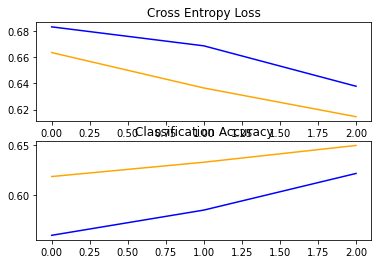

In [9]:
run_test(model, X_train, y_train, X_test, y_test)

### Modelo VGG-2

In [ ]:
model = VGG2()
model.summary()

### Modelo VGG2-Dropout

In [39]:
model = vgg_dropout()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 100, 100, 32)      0         
                                                                 
 flatten_3 (Flatten)         (None, 320000)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               40960128  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

In [40]:
run_test(model, X_train, y_train, X_test, y_test)

Epoch 1/3
500/500 [==============================] - 352s 703ms/step - loss: 0.6977 - accuracy: 0.5233 - val_loss: 0.6802 - val_accuracy: 0.5605
Epoch 2/3
500/500 [==============================] - 337s 675ms/step - loss: 0.6838 - accuracy: 0.5524 - val_loss: 0.6795 - val_accuracy: 0.5723
Epoch 3/3
157/157 [==============================] - 21s 133ms/step - loss: 0.6945 - accuracy: 0.5062
> 50.620


### Model Data Augmentation

In [44]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)

it = datagen.flow(X_train, y_train)

run_test(model, it.x, it.y, X_test, y_test)

Fitting model

Epoch 1/3
500/500 [==============================] - 308s 614ms/step - loss: 0.6922 - accuracy: 0.5421 - val_loss: 0.6849 - val_accuracy: 0.5418
Epoch 2/3
500/500 [==============================] - 313s 627ms/step - loss: 0.6761 - accuracy: 0.5844 - val_loss: 0.6705 - val_accuracy: 0.5925
Epoch 3/3
500/500 [==============================] - 312s 624ms/step - loss: 0.6654 - accuracy: 0.6054 - val_loss: 0.6651 - val_accuracy: 0.5950

Evaluate model

157/157 [==============================] - 20s 126ms/step - loss: 0.6689 - accuracy: 0.5898
Accuracy = 58.980
